In [ ]:
#import packages
!pip install imblearn
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


In [81]:
path = os.getcwd()
print(str(path).replace("\\", "/"))
main_path = 'C:/Users/HP/Pictures/githubhoanchinh'
os.chdir(main_path)
# print(os.getcwd())

C:/Users/HP/Pictures/githubhoanchinh


In [82]:
#read HR-Employee-Attrition.csv file
df_attrition= pd.read_csv('data/raw/HR-Employee-Attrition.csv')
pd.set_option('display.max_columns', None)
df_attrition.head(5)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Phân chia tập train - test

In [83]:

X = df_attrition.drop('Attrition', axis=1)
y = df_attrition['Attrition']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [84]:
#Concate X data and y data
train_df_attrition = pd.concat([X_train, y_train], axis=1)
test_df_attrition = pd.concat([X_test, y_test], axis=1)
# #Save data
# train_df_attrition.to_csv(path + '/data/processed/train_data_attrition.csv', index=False)
# test_df_attrition.to_csv(path +'/data/processed/test_data_attrition.csv', index=False)

# Hiển thị thông tin dữ liệu

In [85]:
df = train_df_attrition
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1176 entries, 1097 to 1126
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1176 non-null   int64 
 1   BusinessTravel            1176 non-null   object
 2   DailyRate                 1176 non-null   int64 
 3   Department                1176 non-null   object
 4   DistanceFromHome          1176 non-null   int64 
 5   Education                 1176 non-null   int64 
 6   EducationField            1176 non-null   object
 7   EmployeeCount             1176 non-null   int64 
 8   EmployeeNumber            1176 non-null   int64 
 9   EnvironmentSatisfaction   1176 non-null   int64 
 10  Gender                    1176 non-null   object
 11  HourlyRate                1176 non-null   int64 
 12  JobInvolvement            1176 non-null   int64 
 13  JobLevel                  1176 non-null   int64 
 14  JobRole                   

## Mô tả các trường dữ liệu
- Age: Tuổi của nhân viên
- Attrition: Tình trạng nghỉ việc
- Gender: Giới tính của nhân viên
- BusinessTravel: Tần suất nhân viên đi công tác
- DailyRate: Tiền lương hàng ngày của nhân viên
- Department: Phòng ban nhân viên
- DistanceFromHome: Khoảng cách từ nhà đến văn phòng theo km
- Education: Trình độ của nhân viên
- EducationField: Lĩnh vực giáo dục
- EmployeeCount: Số lượng nhân viên
- EmployeeNumber: ID nhân viên
- EnvironmentSatisfaction: Sự hài lòng về môi trường làm việc
- HourlyRate: Mức lương theo giờ của nhân viên
- JobInvolvement: Mức độ tham gia công việc
- JobLevel: Cấp độ công việc
- JobRole: Vai trò công việc của nhân viên
- JobSatisfaction: Mức độ hài lòng trong công việc của nhân viên
- MaritalStatus: Tình trạng hôn nhân
- MonthlyIncome: Thu nhập của nhân viên
- MonthlyRate: Mức lương hàng tháng của nhân viên
- NumCompaniesWorked: Số công ty đã làm việc
- Over18: Độ tuổi trên 18
- OverTime: Nhân viên làm thêm giờ
- PercentSalaryHike: Tỷ lệ được tăng lương
- PerformanceRating: Đánh giá hiệu suất
- RelationshipSatisfaction: Mức độ hài lòng trong mối quan hệ
- StandardHours: Giờ làm việc tiêu chuẩn mỗi tuần
- StockOptionLevel: Quyền chọn cổ phiếu của công ty
- TotalWorkingYears: Tổng số năm làm việc
- TrainingTimesLastYear: Số lần đào tạo năm ngoái
- WorkLifeBalance: Cân bằng giữa công việc và cuộc sống
- YearsAtCompany: Tổng số năm làm việc tại công ty
- YearsInCurrentRole: Tổng số năm giữ chức vụ hiện tại
- YearsSinceLastPromotion: Số năm kể từ lần thăng chức gần nhất
- YearsWithCurrManager: Số năm làm việc dưới quyền quản lý hiện tại

## Tóm tắt thông tin về Values của các features trong data

In [86]:
for col in df.columns:
        print(f"- Kiểm tra  cột {col}: ")
        print(sorted(df[col].unique()))
        print ('-'*100)

- Kiểm tra  cột Age: 
[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
----------------------------------------------------------------------------------------------------
- Kiểm tra  cột BusinessTravel: 
['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
----------------------------------------------------------------------------------------------------
- Kiểm tra  cột DailyRate: 
[102, 103, 104, 105, 107, 109, 111, 116, 117, 118, 119, 120, 121, 124, 128, 129, 130, 132, 134, 135, 136, 138, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 152, 153, 154, 155, 156, 157, 160, 161, 163, 164, 167, 168, 170, 172, 174, 177, 179, 180, 181, 182, 185, 188, 189, 192, 193, 194, 195, 196, 199, 200, 201, 202, 205, 206, 207, 208, 210, 211, 213, 216, 217, 219, 224, 228, 230, 231, 232, 234, 237, 238, 241, 243, 244, 247, 248, 249, 252, 253, 254, 256, 258, 263, 264, 265, 266, 267

### Tóm tắt:
* Thông tin nhân viên
    + Age: 18 - 60
    + Gender: 'Male' , 'Female'
    + MaritalStatus: 'Single' , 'Married' , 'Divorced'
    + Education: 1 , 2 , 3 , 4 , 5
    + DistanceFromHome: 1 - 29
    + TotalWorkingYears: 0 - 40
    + NumCompaniesWorked 0 - 9

* Thông tin công việc của nhân viên:
    + EducationField: 'Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree'
    + Department: 'Human Resources', 'Research & Development', 'Sales'
    + JobLevel: 1, 2, 3, 4, 5
    + JobRole: 'Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative'
    + JobInvolvement: 1, 2, 3, 4
    + OverTime: Yes, No
    + JobSatisfaction: 1, 2, 3, 4

* Thông tin công ty về nhân viên:
    + YearsAtCompany: 0 - 40
    + YearsInCurrentRole: 0 - 18
    + YearsWithCurrManager: 0 - 17
    + YearsSinceLastPromotion: 0 -15
    + TrainingTimesLastYear: 0 - 6
    + WorkLifeBalance: 1, 2, 3, 4

* Thông tin về công ty:
    + PercentSalaryHike: 11 - 25
    + StockOptionLevel: 0, 1, 2, 3
    + BusinessTravel: 'Non-Travel', 'Travel_Frequently', 'Travel_Rarely'
    + PerformanceRating: 3, 4
    + EnvironmentSatisfaction: 1, 2, 3, 4
    + RelationshipSatisfaction: 1, 2, 3, 4

* Thông tin về lương thưởng:
    + MonthlyIncome: 1k - 20k
    + HourlyRate: 30 - 100
    + DailyRate: 100 - 1500
    + MonthlyRate: 2000 - 27000

## Hiển thị một số thống kê mô tả


In [87]:
#display descriptive statistics
df.describe(include='int64')

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,36.774660,799.410714,9.260204,2.896259,1.0,1028.283163,2.695578,66.671769,2.721939,2.028061,2.735544,6382.523810,14312.306973,2.649660,15.243197,3.155612,2.691327,80.0,0.812075,11.119048,2.795918,2.751701,6.929422,4.208333,2.107143,4.027211
std,9.203851,405.727156,8.153860,1.038552,0.0,607.598269,1.088828,20.463674,0.713442,1.103215,1.097290,4708.474648,7107.757641,2.502707,3.666112,0.362642,1.080958,0.0,0.859227,7.814952,1.297795,0.694965,6.088646,3.613681,3.117896,3.526571
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,464.000000,2.000000,2.000000,1.0,492.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2813.250000,8005.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,796.500000,7.000000,3.000000,1.0,1018.000000,3.000000,67.000000,3.000000,2.000000,3.000000,4731.500000,14242.000000,1.500000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.250000,14.000000,4.000000,1.0,1569.750000,4.000000,84.000000,3.000000,3.000000,4.000000,8168.000000,20475.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Kiểm tra số lượng giá trị null ở mỗi trường

In [88]:
print(df.isnull().sum())

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

## Kiểm tra giá trị trùng lặp

In [89]:
print(f"Số lượng dòng trùng lặp có trong data là {df.duplicated().sum()}") #Kiểm tra giá trị lặp trong dữ liệu

Số lượng dòng trùng lặp có trong data là 0


## Lựa chọn các trường dữ liệu định lượng để thực hiện kiểm tra outlier
Ở đây ta sẽ lựa chọn các trường dữ liệu định lượng để thực hiện kiểm tra outlier

In [90]:
#Exclude object data
non_object_columns = df.select_dtypes(exclude='object').columns
print(non_object_columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


Các trường dữ liệu trên đây là các trường mà ta sẽ thực hiện việc xử lí outliers

In [91]:
def remove_outliers_iqr(df, columns, factor=1.5):
    df_clean = df.copy()
    for col in columns:
        if col in df_clean.columns:
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - factor * IQR
            upper_bound = Q3 + factor * IQR
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean


In [92]:
df_no_outliers = remove_outliers_iqr(df, non_object_columns)
print(f"The size of dataframe before exclude outliers: {df.shape}")
print(f"The size of dataframe after exclude outliers: {df_no_outliers.shape}")


The size of dataframe before exclude outliers: (1176, 35)
The size of dataframe after exclude outliers: (553, 35)


In [34]:
print(f"The proportion of data that is outlier accounted for {(1 - df_no_outliers.shape[0]/df.shape[0])*100}%")

The proportion of data that is outlier accounted for 52.976190476190474%


Đánh giá: Sau khi xử lý bộ dữ liệu và giả định loại bỏ các giá trị outlier, ta thấy dữ liệu outlier chiếm hơn 50% bộ dữ liệu, ta thực hiện visualize để quan sát xem dữ liệu ở trường nào có outlier bằng cách sử dụng biểu đồ boxplot

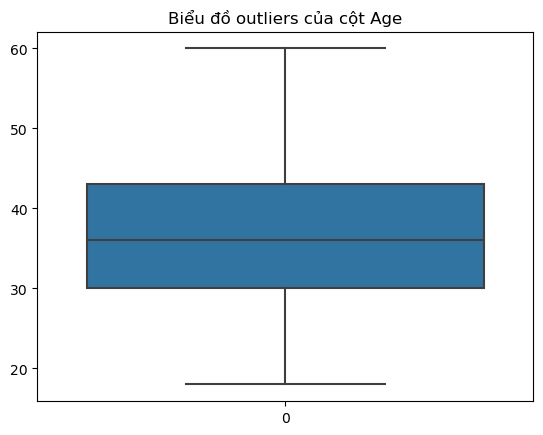

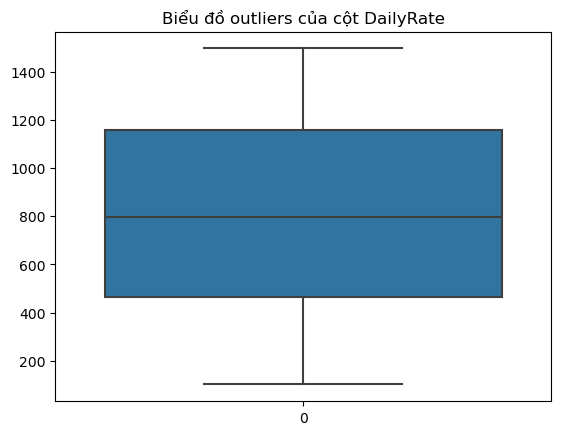

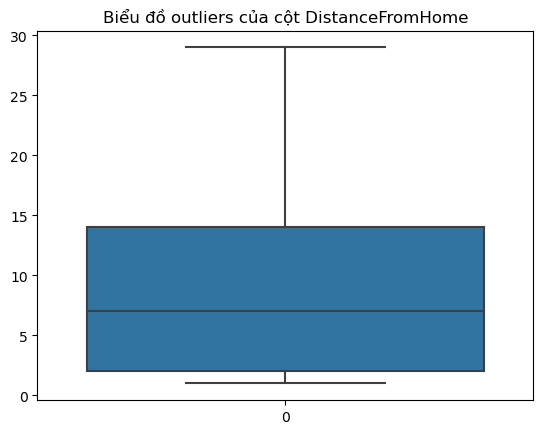

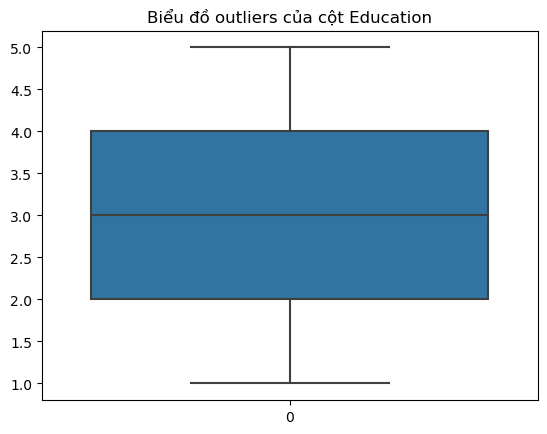

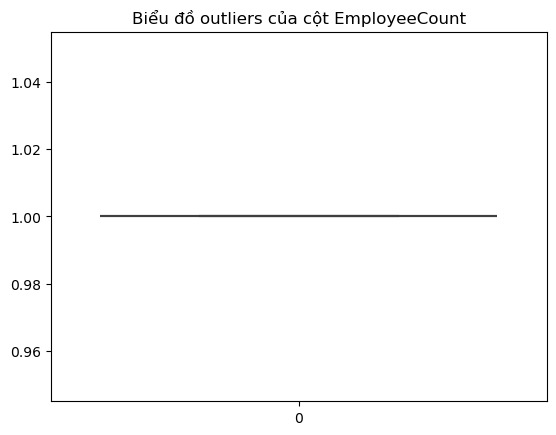

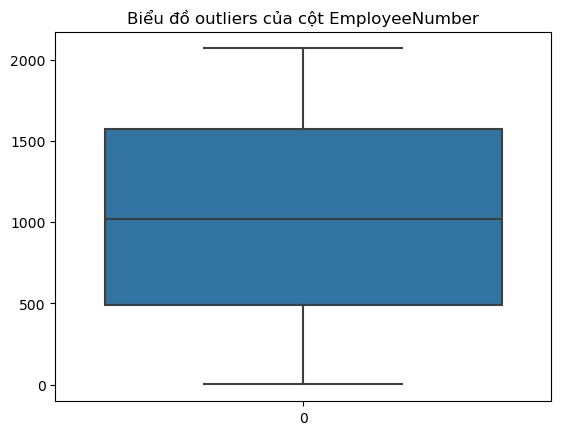

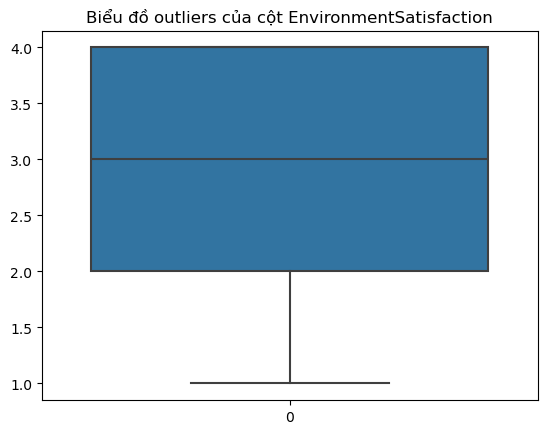

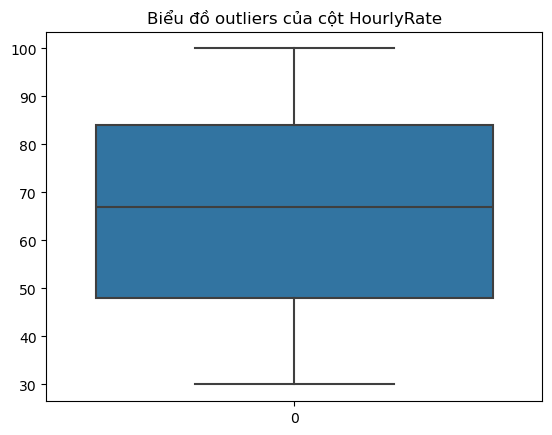

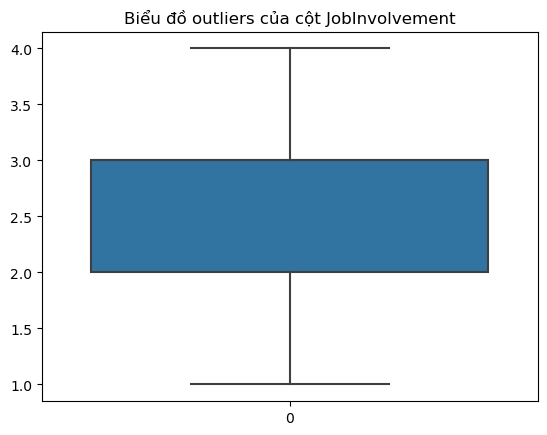

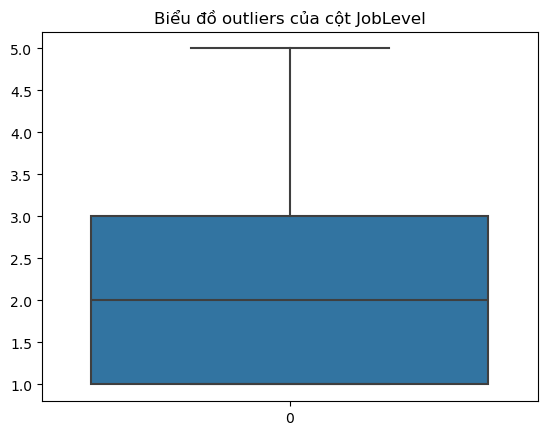

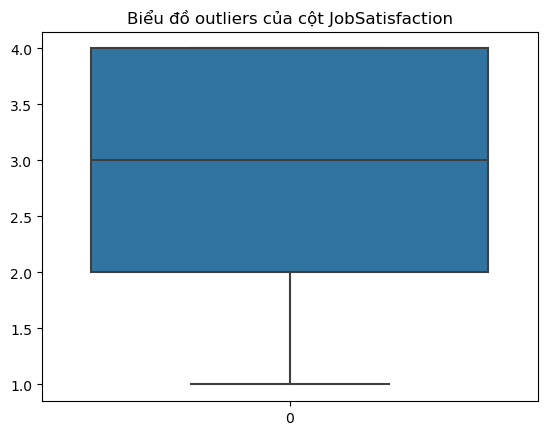

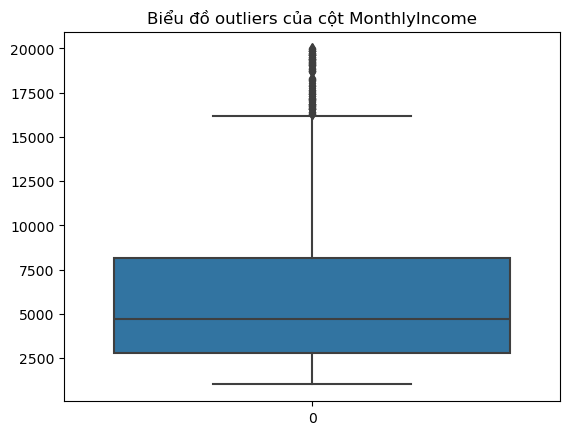

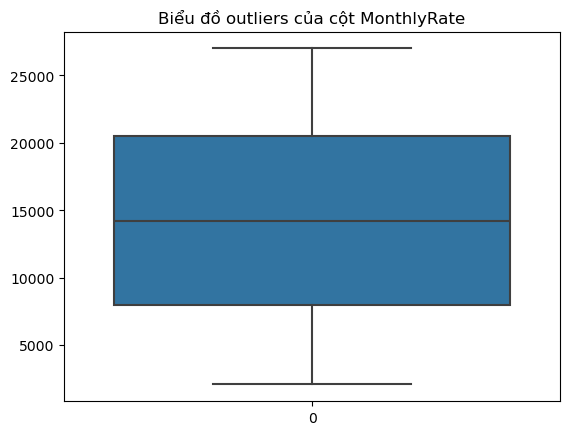

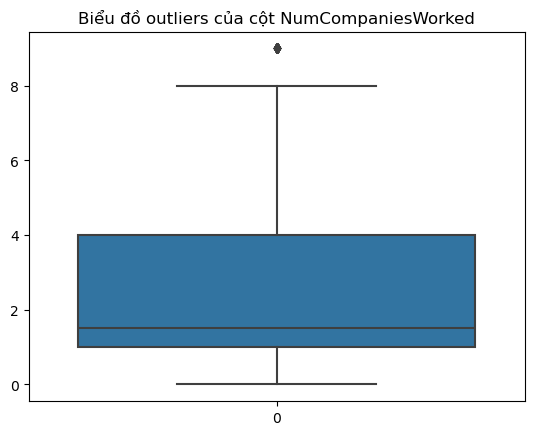

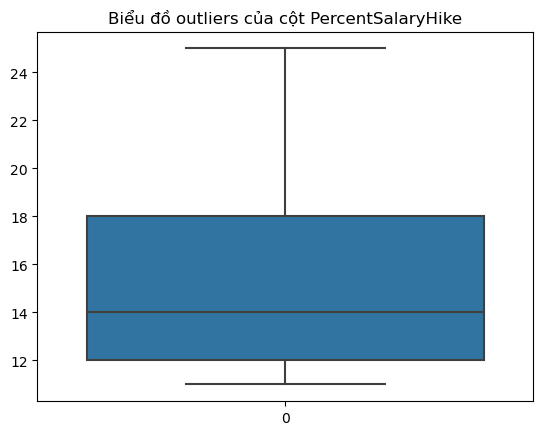

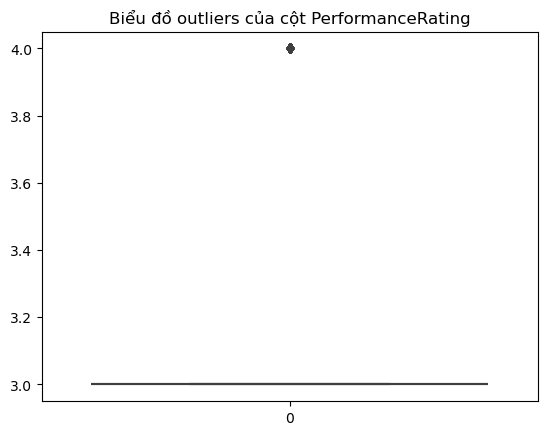

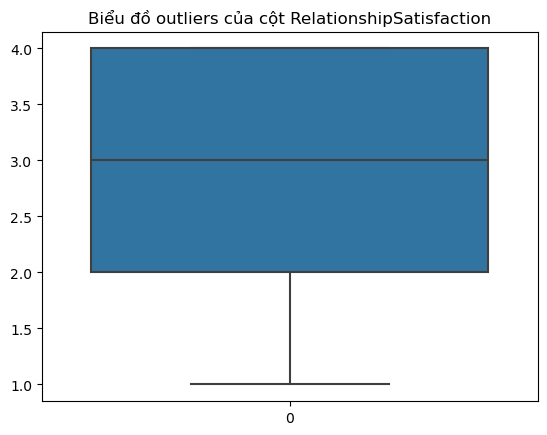

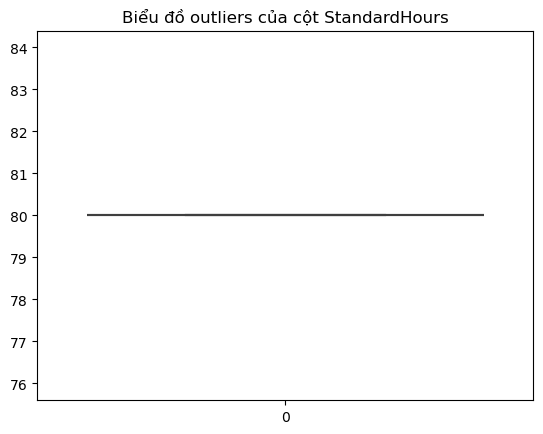

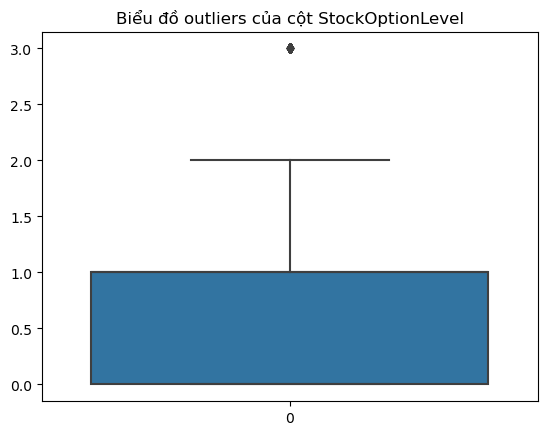

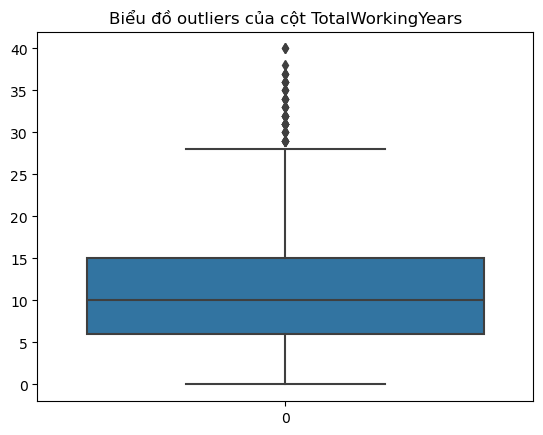

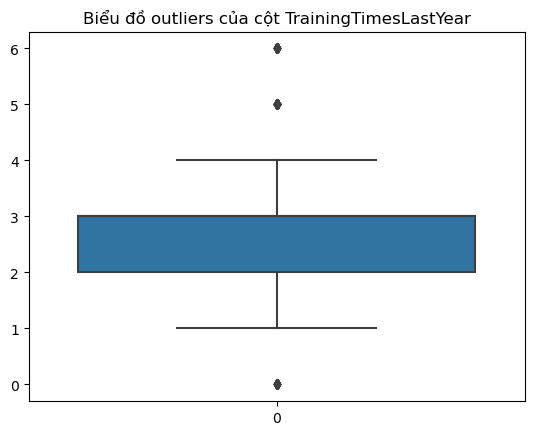

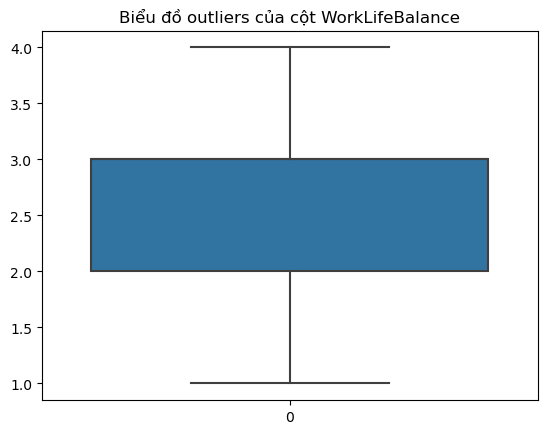

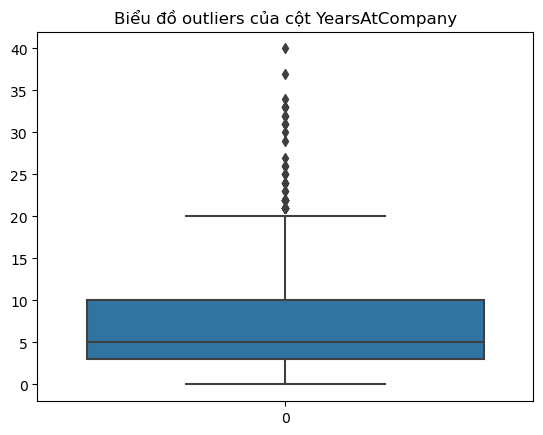

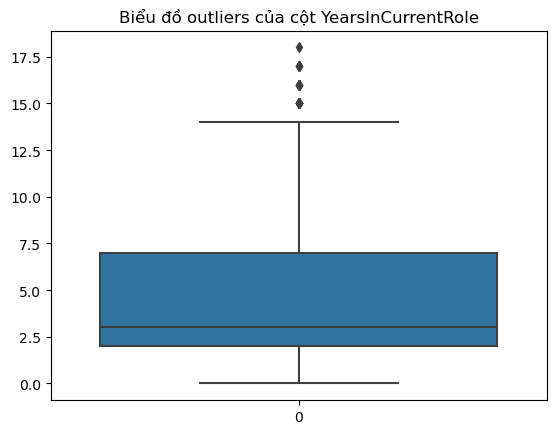

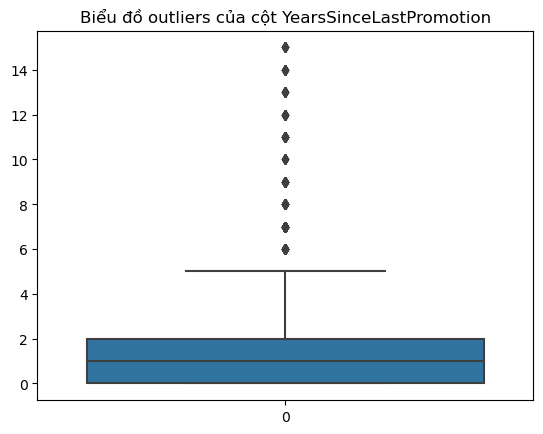

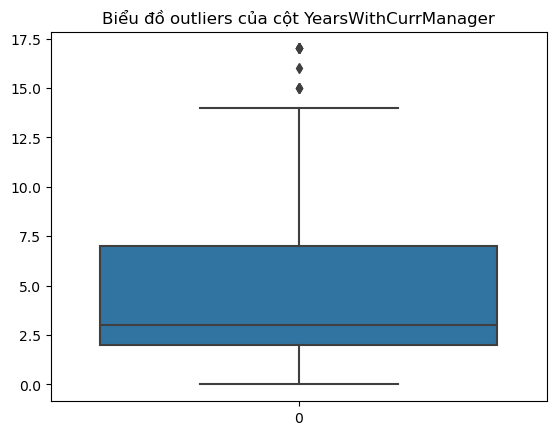

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
col = []
def visualize(col):
  sns.boxplot(df[col])
  plt.title(f"Biểu đồ outliers của cột {col}")
  plt.show()

for col in non_object_columns:
  visualize(col)

Nhận xét từng biểu đồ:
- Age:
  + Phân bố khá đều, không có outlier rõ rệt.
  + Dao động từ khoảng 18 đến 60 tuổi.
  + Phân bố hơi nghiêng về nhóm tuổi 30 đến 40.
- DailyRate:
  + Có nhiều outliers ở cả hai phía (cao và thấp).
  + Phân bố rộng, lương theo ngày dao động mạnh.
- DistanceFromHome:
  + Có một vài outliers phía trên (> 25km).
  + Phần lớn nhân viên sống cách nơi làm < 20km.
- Education:
  + Giá trị từ 1 đến 5, không có outliers.
- EmployeeCount:
  + Chỉ có một giá trị (1) cho toàn bộ.
- EmployeeNumber:
  + Là ID nhân viên, không mang ý nghĩa số học
- EnvirontmentSatisfaction:
  + Giá trị 1 đến 4, không có outliers.
- HourlyRate:
  + Có vài outliers nhẹ phía trên và dưới.
  + Lương theo giờ phân bố không đều, nhưng không có bất thường nghiêm trọng.
- JobInvolvement:
  + Giá trị 1 đến 4, không có outliers.
  + Là thang đo mức độ tham gia
- JobLevel:
  + Phân bố hợp lý trong khoảng 1 đến 5.
  + Không có outliers.
- JobSatisfaction:
  + Giá trị từ 1 đến 4, không có outlier.
  + Thang đo mức độ hài lòng trong công việc
- MonthlyIncome:
  + Có rất nhiều outliers ở phía cao.
  + Một số nhân viên có thu nhập > 20.000 trong khi phần lớn < 10.000.
- MonthlyRate:
  + Nhiều outliers ở phía cao.
  + Có thể do một số nhân viên nhận lương cao hoặc phụ cấp lớn.
- NumCompaniesWorked:
  + Có outliers (giá trị lớn như 9).
  + Đa phần nhân viên từng làm < 5 công ty.
- PercentSalaryHike:
  + Một vài điểm outlier (> 20%).
  + Mức tăng lương thường từ 10 đến 15%.
- PerformanceRating:
  + Hầu như chỉ có 2 giá trị (3, 4), không có outlier.
- RelationshipSatisfaction:
  + Giá trị từ 1 đến 4, không có outlier.
- StandardHours:
  Giá trị luôn là 80.
- StockOptionLevel:
  + Giá trị từ 0 đến 3, không có outlier.
- TotalWorkingYears:
  + Có vài outliers > 35 đến 40 năm.
  + Phần lớn nhân viên có kinh nghiệm < 20 năm.
- TrainingTimesLastYear:
  + Giá trị 0 đến 6, có phân bố đều.
- WorkLifeBalance:
  + Giá trị 1 đến 4, không có outliers.
- YearsAtCompany:
  + Có outliers > 30 năm.
  + Đa số làm dưới 10 năm
- YearsInCurrentRole:
  + Phân bố hợp lý, có vài outliers ở giá trị cao.
- YearsSinceLastPromotion:
  + Có outliers rõ (15 năm không được thăng chức).
- YearsWithCurrManager:
  + Có vài giá trị lớn hơn phần còn lại (> 15 năm).



- Đánh giá chung: Việc có sự xuất hiện dữ liệu outliers trong bộ dữ liệu thuộc lĩnh vực này nguyên nhân là do đặc thù của các công ty, giả sử ở trường MonthlyIncome, có rất nhiều giá trị outliers vì những người này nắm giữ những vị trí quan trọng trong công ty, và mức lương của họ sẽ có sự chênh lệch đối với nhân viên trong công ty, nên mặt bằng chung các giá trị này thường trội hơn giá trị trung bình. <br>
- Đề xuất: Ta sẽ không loại bỏ các giá trị outliers, và ta sẽ thực hiện đánh giá ở bước Data Analysis để đưa ra kết luận

# Ta sẽ thực hiện Encoding các trường dữ liệu Categoricals

In [ ]:
df_train=pd.read_csv("data/processed/train_data_attrition.csv")
df_train.head()
df_test=pd.read_csv("data/processed/test_data_attrition.csv")
df_test.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,28,Travel_Rarely,866,Sales,5,3,Medical,1,1469,4,Male,84,3,2,Sales Executive,1,Single,8463,23490,0,Y,No,18,3,4,80,0,6,4,3,5,4,1,3,No
1,53,Travel_Rarely,1084,Research & Development,13,2,Medical,1,250,4,Female,57,4,2,Manufacturing Director,1,Divorced,4450,26250,1,Y,No,11,3,3,80,2,5,3,3,4,2,1,3,No
2,24,Travel_Rarely,240,Human Resources,22,1,Human Resources,1,1714,4,Male,58,1,1,Human Resources,3,Married,1555,11585,1,Y,No,11,3,3,80,1,1,2,3,1,0,0,0,Yes
3,45,Travel_Rarely,1339,Research & Development,7,3,Life Sciences,1,86,2,Male,59,3,3,Research Scientist,1,Divorced,9724,18787,2,Y,No,17,3,3,80,1,25,2,3,1,0,0,0,No
4,36,Travel_Rarely,1396,Research & Development,5,2,Life Sciences,1,304,4,Male,62,3,2,Laboratory Technician,2,Single,5914,9945,8,Y,No,16,3,4,80,0,16,3,4,13,11,3,7,No


In [94]:
non_object_columns = df_train.select_dtypes(exclude='object').columns
print(non_object_columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [95]:
from sklearn.preprocessing import LabelEncoder
object_columns_train = df_train.select_dtypes(include='object').columns
print(object_columns_train)
object_df_train= df_train[object_columns_train]
for col in object_columns_train:
    le = LabelEncoder()
    object_df_train[col] = le.fit_transform(object_df_train[col])
df_train_le = df_train.copy()
for col in object_columns_train:
    df_train_le[col] = object_df_train[col]


object_columns_test = df_test.select_dtypes(include='object').columns
print(object_columns_test)
object_df_test = df_test[object_columns_test]
for col in object_columns_test:
    le = LabelEncoder()
    object_df_test[col] = le.fit_transform(object_df_test[col])
df_test_le = df_test.copy()
for col in object_columns_test:
    df_test_le[col] = object_df_test[col]

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime', 'Attrition'],
      dtype='object')
Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime', 'Attrition'],
      dtype='object')


C:\Users\HP\AppData\Local\Temp\ipykernel_8632\1893830233.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_df_train[col] = le.fit_transform(object_df_train[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_8632\1893830233.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  object_df_train[col] = le.fit_transform(object_df_train[col])
C:\Users\HP\AppData\Local\Temp\ipykernel_8632\1893830233.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [96]:
df_train_le.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,24,2,350,1,21,2,5,1,1551,3,1,57,2,1,2,1,0,2296,10036,0,0,0,14,3,2,80,3,2,3,3,1,1,0,0,0
1,18,0,287,1,5,2,1,1,1012,2,1,73,3,1,6,4,2,1051,13493,1,0,0,15,3,4,80,0,0,2,3,0,0,0,0,0
2,29,2,1247,2,20,2,2,1,349,4,1,45,3,2,7,4,0,6931,10732,2,0,0,14,3,4,80,1,10,2,3,3,2,0,2,0
3,39,2,492,1,12,3,3,1,1654,4,1,66,3,2,4,2,1,5295,7693,4,0,0,21,4,3,80,0,7,3,3,5,4,1,0,0
4,31,2,311,1,20,3,1,1,1881,2,1,89,3,2,2,3,0,4197,18624,1,0,0,11,3,1,80,1,10,2,3,10,8,0,2,0


In [97]:
df_test_le.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,28,2,866,2,5,3,3,1,1469,4,1,84,3,2,7,1,2,8463,23490,0,0,0,18,3,4,80,0,6,4,3,5,4,1,3,0
1,53,2,1084,1,13,2,3,1,250,4,0,57,4,2,4,1,0,4450,26250,1,0,0,11,3,3,80,2,5,3,3,4,2,1,3,0
2,24,2,240,0,22,1,0,1,1714,4,1,58,1,1,1,3,1,1555,11585,1,0,0,11,3,3,80,1,1,2,3,1,0,0,0,1
3,45,2,1339,1,7,3,1,1,86,2,1,59,3,3,6,1,0,9724,18787,2,0,0,17,3,3,80,1,25,2,3,1,0,0,0,0
4,36,2,1396,1,5,2,1,1,304,4,1,62,3,2,2,2,2,5914,9945,8,0,0,16,3,4,80,0,16,3,4,13,11,3,7,0


# Ta tiếp tục Scaling

In [98]:
from sklearn.preprocessing import StandardScaler
train_columns_to_scale =['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
scaler = StandardScaler()
df_train_le[train_columns_to_scale] = scaler.fit_transform(df_train_le[train_columns_to_scale])

test_columns_to_scale =['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
df_test_le[test_columns_to_scale] = scaler.fit_transform(df_test_le[test_columns_to_scale])


In [99]:
df_train_le.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,-1.388559,2,-1.108139,1,1.440396,2,5,1,1551,3,1,-0.472832,2,1,2,1,0,-0.868277,-0.601895,0,0,0,-0.339249,3,2,80,3,-1.167368,0.157319,3,-0.974263,-0.888208,-0.676110,-1.142448,0
1,-2.040738,0,-1.263481,1,-0.522699,2,1,1,1012,2,1,0.309374,3,1,6,4,2,-1.132807,-0.115318,1,0,0,-0.066365,3,4,80,0,-1.423397,-0.613546,3,-1.138573,-1.165051,-0.676110,-1.142448,0
2,-0.845077,2,1.103647,2,1.317703,2,2,1,349,4,1,-1.059487,3,2,7,4,0,0.116537,-0.503933,2,0,0,-0.339249,3,4,80,1,-0.143254,-0.613546,3,-0.645643,-0.611364,-0.676110,-0.575084,0
3,0.241886,2,-0.758001,1,0.336155,3,3,1,1654,4,1,-0.032841,3,2,4,2,1,-0.231070,-0.931675,4,0,0,1.570943,4,3,80,0,-0.527297,0.157319,3,-0.317023,-0.057676,-0.355244,-1.142448,0
4,-0.627685,2,-1.204303,1,1.317703,3,1,1,1881,2,1,1.091580,3,2,2,3,0,-0.464366,0.606876,1,0,0,-1.157903,3,1,80,1,-0.143254,-0.613546,3,0.504527,1.049700,-0.676110,-0.575084,0


In [100]:
df_test_le.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,-1.078036,2,0.129893,2,-0.495769,3,3,1,1469,4,1,1.090274,3,2,7,1,2,0.316245,1.281652,0,0,0,0.805380,3,4,80,0,-0.778269,0.946230,3,-0.370767,-0.085511,-0.420427,-0.406707,0
1,1.752819,2,0.682799,1,0.515549,2,3,1,250,4,0,-0.296236,4,2,4,1,0,-0.542155,1.667249,1,0,0,-1.121914,3,3,80,2,-0.909695,0.149119,3,-0.530365,-0.632035,-0.420427,-0.406707,0
2,-1.530972,2,-1.457810,0,1.653281,1,0,1,1714,4,1,-0.244884,1,1,1,3,1,-1.161409,-0.381586,1,0,0,-1.121914,3,3,80,1,-1.435395,-0.647992,3,-1.009159,-1.178559,-0.698819,-1.216450,1
3,0.846945,2,1.329548,1,-0.242940,3,1,1,86,2,1,-0.193531,3,3,6,1,0,0.585979,0.624599,2,0,0,0.530053,3,3,80,1,1.718809,-0.647992,3,-1.009159,-1.178559,-0.698819,-1.216450,0
4,-0.172162,2,1.474115,1,-0.495769,2,1,1,304,4,1,-0.039475,3,2,2,2,2,-0.228998,-0.610709,8,0,0,0.254725,3,4,80,0,0.535982,0.149119,4,0.906017,1.827324,0.136355,0.672949,0


In [ ]:
df_test_le.to_csv("data/processed/processed_scaling/test_data_attrition_scaling.csv",index=False)

# Tiếp theo ta sẽ kiểm tra độ cân bằng của dữ liệu 

In [101]:
# Đếm số lượng mẫu theo lớp
attrition_counts = df_train_le['Attrition'].value_counts()
print(attrition_counts)

# Tính tỷ lệ phần trăm
attrition_percent = df_train_le['Attrition'].value_counts(normalize=True) * 100
print(attrition_percent)

Attrition
0    978
1    198
Name: count, dtype: int64
Attrition
0    83.163265
1    16.836735
Name: proportion, dtype: float64


Trong ví dụ này, lớp "No" chiếm 83.2%, lớp "Yes" chiếm 16.8% → Dữ liệu mất cân bằng (lớp "Yes" là lớp thiểu số).

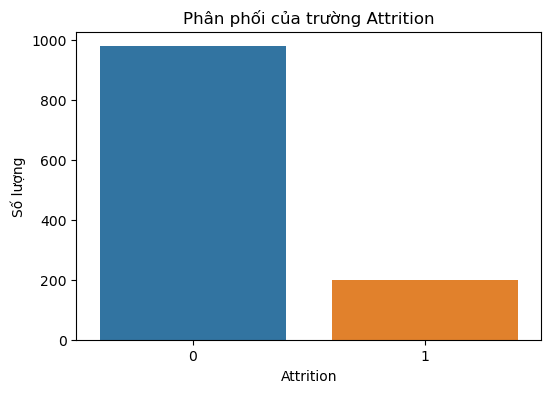

In [ ]:
# Vẽ biểu đồ cột
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=df_train_le)
plt.title('Phân phối của trường Attrition')
plt.xlabel('Attrition')
plt.ylabel('Số lượng')
plt.show()

Cột "No" cao gấp nhiều lần cột "Yes" <br>
Đánh giá mức độ mất cân bằng <br>

- Tỷ lệ mất cân bằng (Imbalance Ratio): Tính tỷ lệ giữa lớp đa số và lớp thiểu số:
- Ta có 978 mẫu "No" và 198 mẫu "Yes", tỷ lệ là 978 / 198 ≈ 4.9:1.

(Ngưỡng đánh giá:<br>
- Tỷ lệ < 2:1: Dữ liệu được coi là cân bằng hoặc ít mất cân bằng.<br>
- Tỷ lệ 2:1 đến 4:1: Mất cân bằng nhẹ.<br>
- Tỷ lệ > 4:1: Mất cân bằng đáng kể.<br>
- Tỷ lệ > 10:1: Mất cân bằng nghiêm trọng.)

=> Kết luận: dữ liệu mất cân bằng đáng kể

In [ ]:
categorical_cols = df_train_le.select_dtypes(include=['object', 'category']).columns.tolist()
if 'Attrition' in categorical_cols:
    categorical_cols.remove('Attrition')

df_encoded = pd.get_dummies(df_train_le, columns=categorical_cols, drop_first=True) 

X = df_encoded.drop('Attrition', axis=1)  
y = df_encoded['Attrition']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(pd.Series(y_train_resampled).value_counts())
df_train_le = pd.concat([X_train_resampled, y_train_resampled], axis=1)
df_train_le

Attrition
0    787
1    787
Name: count, dtype: int64


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,-0.953774,1,-0.040465,2,-1.013473,2,1,1,1927,3,1,-1.206150,2,2,7,4,1,0.095927,0.695690,1,0,1,-0.885018,3,3,80,1,-0.527297,-0.613546,3,0.011597,0.772856,-0.676110,0.843327,0
1,0.241886,1,-0.878823,1,-0.154619,1,1,1,602,3,0,-0.912823,3,1,2,3,1,-0.558279,0.501031,1,0,0,-1.157903,3,1,80,1,-0.399283,0.157319,3,0.175907,-0.334520,-0.676110,0.843327,0
2,0.024494,2,0.968031,1,-0.522699,2,3,1,460,4,1,-0.277281,3,2,4,4,0,-0.007548,1.247716,7,0,0,0.206520,3,3,80,2,-0.399283,-0.613546,2,-0.152713,-0.611364,-0.676110,-0.007719,0
3,-0.192899,2,0.844743,1,1.685783,4,3,1,75,3,0,-1.792805,3,1,2,1,1,-0.503248,0.237826,3,0,1,-0.066365,3,3,80,1,-0.911340,0.157319,3,-0.809953,-0.611364,-0.034378,-0.575084,0
4,-0.084203,2,-0.723480,1,-0.768086,3,5,1,397,3,1,-1.792805,3,2,6,2,2,-0.403173,1.685171,4,0,0,-0.885018,3,4,80,0,-0.143254,-0.613546,3,0.175907,-1.165051,1.569949,0.843327,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,-0.673094,1,0.195976,1,0.416871,3,1,1,1755,1,0,0.081015,2,2,4,3,0,-0.153021,0.114993,3,0,0,-0.840138,3,1,80,2,-0.357175,-1.257630,2,-0.768334,-0.933739,-0.542063,-0.905422,1
1570,-0.066478,2,-0.168914,0,0.303755,3,0,1,1854,1,0,-0.356926,2,1,3,1,0,-0.414235,-0.926410,4,0,0,0.623526,3,3,80,3,-0.371943,-0.167490,3,-0.394554,-0.028113,-0.304776,-0.305728,1
1571,-0.599161,2,-0.317007,1,0.963537,3,1,1,178,1,0,-0.173273,1,1,5,2,1,-0.407467,0.936536,4,0,0,-0.370196,3,2,80,0,-0.709780,-0.613546,3,-0.680600,-0.466066,-0.202780,-0.426197,1
1572,-0.772094,1,0.631606,1,-0.925584,3,3,1,1108,1,1,-0.580881,2,1,3,1,0,-0.450109,-0.900057,0,0,0,0.389745,3,1,80,1,-1.050848,-0.613546,3,-0.699629,-0.702323,-0.369648,-0.668290,1


In [104]:
df_train_le.to_csv("data/processed/processed_scaling/train_data_attrition_scaling.csv",index=False)